# Ulepszanie modelu dla Decision Tree Clasifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from scipy.stats import randint as sp_randint
from sklearn import model_selection

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier


## Załadowanie danych

In [2]:
full_data_vector = pd.read_csv('../../learning_vectors/v05/version5-complete.csv', sep=',')

print(full_data_vector.shape)
#full_data_vector.head()


(6080, 62)


In [3]:
all_features = [
    # 'Match_id', 'League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result', 
    'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
    'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
    'H_age', 'A_age', 'H_TMV', 'A_TMV',
    # 'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 
    'H_Form03', 'A_Form03', 'H_Form05', 'A_Form05',
    'H_MeanShots03', 'A_MeanShots03', 'H_MeanShots05', 'A_MeanShots05',
    'H_MeanShotsOnTarget03', 'A_MeanShotsOnTarget03', 'H_MeanShotsOnTarget05', 'A_MeanShotsOnTarget05',
    'H_MeanFullTimeGoals03', 'A_MeanFullTimeGoals03', 'H_MeanFullTimeGoals05', 'A_MeanFullTimeGoals05',
    'H_WeightedMeanShots03', 'A_WeightedMeanShots03', 'H_WeightedMeanShots05', 'A_WeightedMeanShots05',
    'H_WeightedMeanShotsOnTarget03', 'A_WeightedMeanShotsOnTarget03',
    'H_WeightedMeanShotsOnTarget05', 'A_WeightedMeanShotsOnTarget05',
    'H_WeightedMeanFullTimeGoals03', 'A_WeightedMeanFullTimeGoals03',
    'H_WeightedMeanFullTimeGoals05', 'A_WeightedMeanFullTimeGoals05'
]

print(full_data_vector[all_features].shape)
full_data_vector[all_features].head()


(6080, 48)


,H_Speed,H_Pass,H_Shoot,H_Pressure,H_chPass,H_chCross,H_dAggr,H_dWidth,A_Speed,A_Pass,...,H_WeightedMeanShots05,A_WeightedMeanShots05,H_WeightedMeanShotsOnTarget03,A_WeightedMeanShotsOnTarget03,H_WeightedMeanShotsOnTarget05,A_WeightedMeanShotsOnTarget05,H_WeightedMeanFullTimeGoals03,A_WeightedMeanFullTimeGoals03,H_WeightedMeanFullTimeGoals05,A_WeightedMeanFullTimeGoals05
0,66,30,35,30,30,45,40,50,65,40,...,19.617647,11.823529,15.578947,7.368421,11.558824,5.058824,2.842105,1.315789,2.000000,0.735294
1,60,70,55,35,70,70,70,35,50,35,...,8.000000,17.882353,3.473684,11.473684,4.235294,9.529412,0.000000,1.421053,0.558824,1.764706
2,58,30,50,30,31,70,70,30,70,70,...,13.558824,17.264706,8.052632,9.052632,8.058824,9.176471,1.473684,1.368421,1.029412,1.117647
3,60,65,45,40,60,70,70,40,55,70,...,13.088235,13.911765,7.631579,10.263158,6.941176,7.764706,1.947368,3.368421,1.882353,2.058824
4,70,70,50,30,70,70,70,30,70,50,...,13.058824,10.735294,9.631579,7.157895,7.558824,6.382353,2.421053,3.263158,1.941176,2.411765


In [4]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Rank {0}: Mean validation score: {1:.5f} (std: {2:.5f})"
                  .format(i,
                          results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Params: {0}".format(results['params'][candidate]))


## --- 
## Znajdowanie hiperparametrów dla modelu końcowego.

In [11]:
final_model = [
    #'H_age', 'A_age', 
    'H_TMV', 'A_TMV',
    #'H_Form03', 'A_Form03', 
    'H_Form05', 'A_Form05',
    #'H_MeanShots03', 'A_MeanShots03', 
    #'H_MeanShots05', 'A_MeanShots05',
    #'H_MeanShotsOnTarget03', 'A_MeanShotsOnTarget03', 
    #'H_MeanShotsOnTarget05', 'A_MeanShotsOnTarget05',
    #'H_MeanFullTimeGoals03', 'A_MeanFullTimeGoals03', 
    #'H_MeanFullTimeGoals05', 'A_MeanFullTimeGoals05',
    #'H_WeightedMeanShots03', 'A_WeightedMeanShots03', 
    'H_WeightedMeanShots05', 'A_WeightedMeanShots05',
    #'H_WeightedMeanShotsOnTarget03', 'A_WeightedMeanShotsOnTarget03',
    'H_WeightedMeanShotsOnTarget05', 'A_WeightedMeanShotsOnTarget05',
    #'H_WeightedMeanFullTimeGoals03', 'A_WeightedMeanFullTimeGoals03',
    'H_WeightedMeanFullTimeGoals05', 'A_WeightedMeanFullTimeGoals05'
]

final_vector = full_data_vector[final_model]
final_vector.head()


,H_TMV,A_TMV,H_Form05,A_Form05,H_WeightedMeanShots05,A_WeightedMeanShots05,H_WeightedMeanShotsOnTarget05,A_WeightedMeanShotsOnTarget05,H_WeightedMeanFullTimeGoals05,A_WeightedMeanFullTimeGoals05
0,250.0,64.0,7,1,19.617647,11.823529,11.558824,5.058824,2.000000,0.735294
1,91.0,257.0,3,12,8.000000,17.882353,4.235294,9.529412,0.558824,1.764706
2,80.0,61.0,5,5,13.558824,17.264706,8.058824,9.176471,1.029412,1.117647
3,162.0,86.0,10,4,13.088235,13.911765,6.941176,7.764706,1.882353,2.058824
4,73.0,212.0,11,7,13.058824,10.735294,7.558824,6.382353,1.941176,2.411765


## -----
## Poszukiwanie szerokich przedziałów dla poszczególnych cech

In [12]:
classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    "max_depth": range(2, 30),
    # "max_features": range(1, 6),
    # "min_samples_leaf": range(2, 600),
    # "min_samples_split": np.linspace(0.01, .99, num=99),
    # "criterion": ["gini", "entropy"]
}

cross_validator = model_selection.KFold(n_splits=5, shuffle=True)

# run grid search
grid_search = GridSearchCV(classifier,
                           param_grid=param_grid,
                           cv=cross_validator)

y = full_data_vector['Result']
X = final_vector

start = time()
grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings.\n"
      % (time() - start, len(grid_search.cv_results_['params'])))
print("Best params: {}, best score: {}\n"
      .format(grid_search.best_params_, grid_search.best_score_))

report(grid_search.cv_results_, 10)


GridSearchCV took 3.29 seconds for 28 candidate parameter settings.

Best params: {'max_depth': 2}, best score: 0.532072368421

Rank 1: Mean validation score: 0.53207 (std: 0.01636)
Params: {'max_depth': 2}
Rank 2: Mean validation score: 0.53109 (std: 0.01440)
Params: {'max_depth': 3}
Rank 3: Mean validation score: 0.52961 (std: 0.01612)
Params: {'max_depth': 4}
Rank 4: Mean validation score: 0.52599 (std: 0.01599)
Params: {'max_depth': 5}
Rank 5: Mean validation score: 0.51628 (std: 0.01883)
Params: {'max_depth': 6}
Rank 6: Mean validation score: 0.50987 (std: 0.01281)
Params: {'max_depth': 7}
Rank 7: Mean validation score: 0.50839 (std: 0.01714)
Params: {'max_depth': 8}
Rank 8: Mean validation score: 0.49408 (std: 0.01226)
Params: {'max_depth': 9}
Rank 9: Mean validation score: 0.47484 (std: 0.00874)
Params: {'max_depth': 10}
Rank 10: Mean validation score: 0.46842 (std: 0.01400)
Params: {'max_depth': 11}


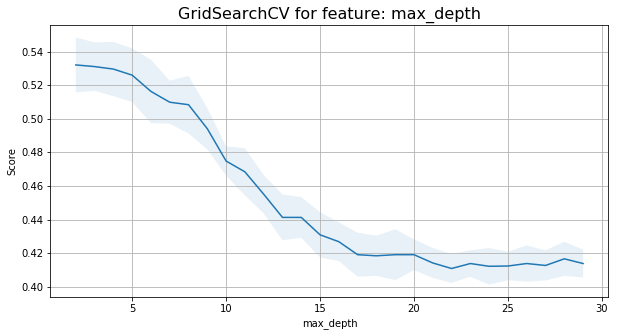

In [13]:
results = grid_search.cv_results_

feature = "max_depth"

plt.figure(figsize=(10, 5))
plt.title("GridSearchCV for feature: %s" % feature, fontsize=16)

plt.xlabel(feature)
plt.ylabel("Score")
plt.grid()

ax = plt.axes()

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_max_depth'].data, dtype=float)

sample_score_mean = results['mean_test_score']
sample_score_std = results['std_test_score']
ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                sample_score_mean + sample_score_std,
                alpha=0.1)
ax.plot(X_axis, sample_score_mean, alpha=1)

plt.show()


## ---
## Luźne testowanie i zabawa zakresami:

In [187]:
#Do zabawy parametrami.

classifier = DecisionTreeClassifier(random_state=42)

parameter_distribution = {
    "max_depth": sp_randint(2, 6),
    "max_features": sp_randint(1, 11),
    "min_samples_split": np.linspace(0.01, .99, num=99),
    "criterion": ["entropy", "gini"]
}

iteration_number = 2000
cross_validator = model_selection.KFold(n_splits=5, shuffle=True)

random_search = RandomizedSearchCV(
    classifier,
    param_distributions=parameter_distribution,
    n_iter=iteration_number,
    cv=cross_validator)

y = full_data_vector['Result']
X = final_vector

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings.\n" % ((time() - start), iteration_number))
print("Best params: {}, best score: {}\n"
      .format(random_search.best_params_, random_search.best_score_))

report(random_search.cv_results_, 20)


RandomizedSearchCV took 67.80 seconds for 2000 candidates parameter settings.

Best params: {'max_features': 9, 'min_samples_split': 0.060000000000000005, 'criterion': 'gini', 'max_depth': 3}, best score: 0.537335526316

Rank 1: Mean validation score: 0.53734 (std: 0.00800)
Params: {'max_features': 9, 'min_samples_split': 0.060000000000000005, 'criterion': 'gini', 'max_depth': 3}
Rank 2: Mean validation score: 0.53701 (std: 0.00763)
Params: {'max_features': 9, 'min_samples_split': 0.089999999999999997, 'criterion': 'entropy', 'max_depth': 3}
Rank 2: Mean validation score: 0.53701 (std: 0.00863)
Params: {'max_features': 9, 'min_samples_split': 0.029999999999999999, 'criterion': 'gini', 'max_depth': 4}
Rank 2: Mean validation score: 0.53701 (std: 0.00863)
Params: {'max_features': 9, 'min_samples_split': 0.029999999999999999, 'criterion': 'gini', 'max_depth': 4}
Rank 2: Mean validation score: 0.53701 (std: 0.00784)
Params: {'max_features': 7, 'min_samples_split': 0.029999999999999999, 'cr

## -----
## Jakość algorytmu dla ostatecznego zakresu 

In [215]:
classifier = DecisionTreeClassifier(random_state=42)

param_grid = {"max_depth": [3, 4, 5, 6],
              "max_features": range(4, 11),
              # "min_samples_leaf": range(2, 200, 10),
              "min_samples_split": np.linspace(0.01, .50, num=100),
              "criterion": ["gini", "entropy"]}

cross_validator = model_selection.KFold(n_splits=5, shuffle=True)

# run grid search
grid_search = GridSearchCV(classifier,
                           param_grid=param_grid,
                           cv=cross_validator)

y = full_data_vector['Result']
X = final_vector

start = time()
grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings.\n"
      % (time() - start, len(grid_search.cv_results_['params'])))
print("Best params: {}, best score: {}\n"
      .format(grid_search.best_params_, grid_search.best_score_))

report(grid_search.cv_results_, 10)


GridSearchCV took 277.01 seconds for 5600 candidate parameter settings.

Best params: {'max_features': 8, 'min_samples_split': 0.064444444444444443, 'criterion': 'entropy', 'max_depth': 4}, best score: 0.536842105263

Rank 1: Mean validation score: 0.53684 (std: 0.01564)
Params: {'max_features': 8, 'min_samples_split': 0.064444444444444443, 'criterion': 'entropy', 'max_depth': 4}
Rank 1: Mean validation score: 0.53684 (std: 0.01568)
Params: {'max_features': 8, 'min_samples_split': 0.069393939393939383, 'criterion': 'entropy', 'max_depth': 4}
Rank 1: Mean validation score: 0.53684 (std: 0.01456)
Params: {'max_features': 8, 'min_samples_split': 0.064444444444444443, 'criterion': 'entropy', 'max_depth': 6}
Rank 1: Mean validation score: 0.53684 (std: 0.01549)
Params: {'max_features': 8, 'min_samples_split': 0.07929292929292929, 'criterion': 'entropy', 'max_depth': 6}
Rank 1: Mean validation score: 0.53684 (std: 0.01549)
Params: {'max_features': 8, 'min_samples_split': 0.08424242424242423,

## ---
## Sprawdzenie jakości algorytmu po użyciu różnic parametrów zamiast dwóch osobnych 

In [240]:
full_data_vector['TMV'] = full_data_vector['H_TMV'] - full_data_vector['A_TMV']
full_data_vector['Form05'] = full_data_vector['H_Form05'] - full_data_vector['A_Form05']
full_data_vector['WeightedMeanShots05'] = full_data_vector['H_WeightedMeanShots05'] - full_data_vector[
    'A_WeightedMeanShots05']
full_data_vector['WeightedMeanShotsOnTarget05'] = full_data_vector['H_WeightedMeanShotsOnTarget05'] - full_data_vector[
    'A_WeightedMeanShotsOnTarget05']
full_data_vector['WeightedMeanFullTimeGoals05'] = full_data_vector['H_WeightedMeanFullTimeGoals05'] - full_data_vector[
    'A_WeightedMeanFullTimeGoals05']

diff_vec = ['TMV', 'Form05', 'WeightedMeanShots05', 'WeightedMeanShotsOnTarget05', 'WeightedMeanFullTimeGoals05']

final_vector_diffs = full_data_vector[diff_vec]
final_vector_diffs.head()


,TMV,Form05,WeightedMeanShots05,WeightedMeanShotsOnTarget05,WeightedMeanFullTimeGoals05
0,186.0,6,7.794118,6.500000,1.264706
1,-166.0,-9,-9.882353,-5.294118,-1.205882
2,19.0,0,-3.705882,-1.117647,-0.088235
3,76.0,6,-0.823529,-0.823529,-0.176471
4,-139.0,4,2.323529,1.176471,-0.470588


In [224]:
classifier = DecisionTreeClassifier(random_state=42)

parameter_distribution = {
    "max_depth": sp_randint(2, 6),
    "max_features": sp_randint(2, 6),
    "min_samples_split": np.linspace(0.01, .50, num=100),
    # "min_samples_leaf": sp_randint(10, 200),
    "criterion": ["entropy", "gini"]
}
iteration_number = 1000
cross_validator = model_selection.KFold(n_splits=5, shuffle=True)

random_search = RandomizedSearchCV(
    classifier,
    param_distributions=parameter_distribution,
    n_iter=iteration_number,
    cv=cross_validator)

y = full_data_vector['Result']
X = final_vector_diffs

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings.\n" % ((time() - start), iteration_number))
print("Best params: {}, best score: {}\n"
      .format(random_search.best_params_, random_search.best_score_))

report(random_search.cv_results_, 20)


RandomizedSearchCV took 36.19 seconds for 1000 candidates parameter settings.

Best params: {'max_features': 4, 'min_samples_split': 0.08424242424242423, 'criterion': 'gini', 'max_depth': 3}, best score: 0.537006578947

Rank 1: Mean validation score: 0.53701 (std: 0.00698)
Params: {'max_features': 4, 'min_samples_split': 0.08424242424242423, 'criterion': 'gini', 'max_depth': 3}
Rank 1: Mean validation score: 0.53701 (std: 0.00698)
Params: {'max_features': 4, 'min_samples_split': 0.064444444444444443, 'criterion': 'gini', 'max_depth': 3}
Rank 1: Mean validation score: 0.53701 (std: 0.00698)
Params: {'max_features': 4, 'min_samples_split': 0.054545454545454543, 'criterion': 'gini', 'max_depth': 3}
Rank 1: Mean validation score: 0.53701 (std: 0.00698)
Params: {'max_features': 4, 'min_samples_split': 0.11888888888888888, 'criterion': 'gini', 'max_depth': 3}
Rank 1: Mean validation score: 0.53701 (std: 0.00698)
Params: {'max_features': 4, 'min_samples_split': 0.12383838383838383, 'criterion

In [225]:
classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    "max_depth": [3, 4, 5, 6],
    "max_features": range(1, 6),
    # "min_samples_leaf": range(2, 200,10),
    "min_samples_split": np.linspace(0.01, .50, num=100),
    "criterion": ["gini", "entropy"]
}

cross_validator = model_selection.KFold(n_splits=5, shuffle=True)

# run grid search
grid_search = GridSearchCV(classifier,
                           param_grid=param_grid,
                           cv=cross_validator)

y = full_data_vector['Result']
X = final_vector_diffs

start = time()
grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings.\n"
      % (time() - start, len(grid_search.cv_results_['params'])))
print("Best params: {}, best score: {}\n"
      .format(grid_search.best_params_, grid_search.best_score_))

report(grid_search.cv_results_, 10)


GridSearchCV took 138.47 seconds for 4000 candidate parameter settings.

Best params: {'max_features': 4, 'min_samples_split': 0.10404040404040403, 'criterion': 'gini', 'max_depth': 5}, best score: 0.536184210526

Rank 1: Mean validation score: 0.53618 (std: 0.00914)
Params: {'max_features': 4, 'min_samples_split': 0.10404040404040403, 'criterion': 'gini', 'max_depth': 5}
Rank 2: Mean validation score: 0.53487 (std: 0.00697)
Params: {'max_features': 3, 'min_samples_split': 0.17828282828282829, 'criterion': 'gini', 'max_depth': 4}
Rank 2: Mean validation score: 0.53487 (std: 0.00887)
Params: {'max_features': 4, 'min_samples_split': 0.10404040404040403, 'criterion': 'gini', 'max_depth': 4}
Rank 2: Mean validation score: 0.53487 (std: 0.00887)
Params: {'max_features': 4, 'min_samples_split': 0.10898989898989898, 'criterion': 'gini', 'max_depth': 4}
Rank 2: Mean validation score: 0.53487 (std: 0.00887)
Params: {'max_features': 4, 'min_samples_split': 0.11393939393939392, 'criterion': 'gini

## Wizualizacja drzewa o wybranych paramtrach

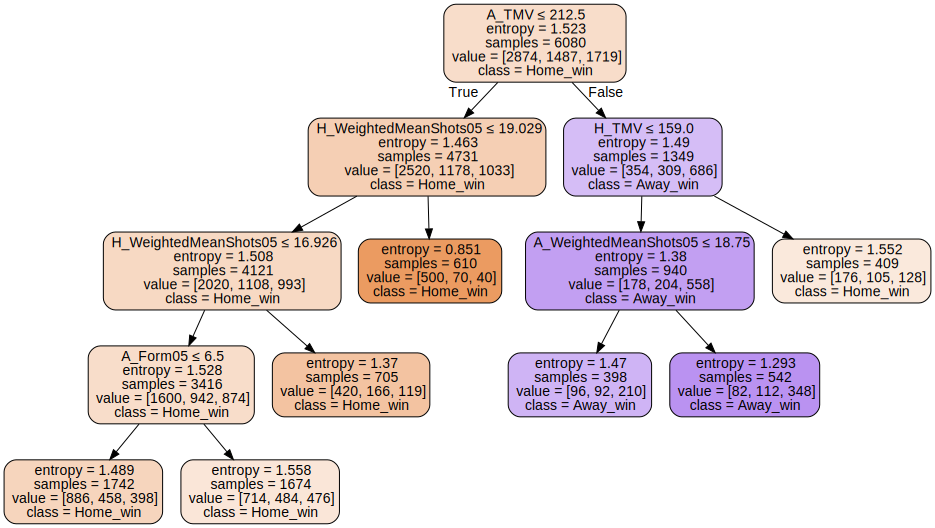

In [251]:
classifier = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=0.06444,
    max_features=8,
    criterion="entropy"
)

y = full_data_vector['Result']
X = final_vector
clf = classifier.fit(X, y)

import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True, rounded=True,
                                class_names=["Home_win", "Draw", "Away_win"],
                                feature_names=final_model,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("tree_model")
graph
